In [1]:
import pywt

# Sólo por ver los distintos filtros que hay disponibles
print (pywt.wavelist())
print(pywt.Modes.modes)

# Seleccionamos una en concreto 
#wavelet = 'db9' # http://wavelets.pybytes.com/wavelet/db9/
#wavelet = 'haar'
#wavelet='bior3.5'
#wavelet = 'db15'
wavelet = 'rbio3.5'

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

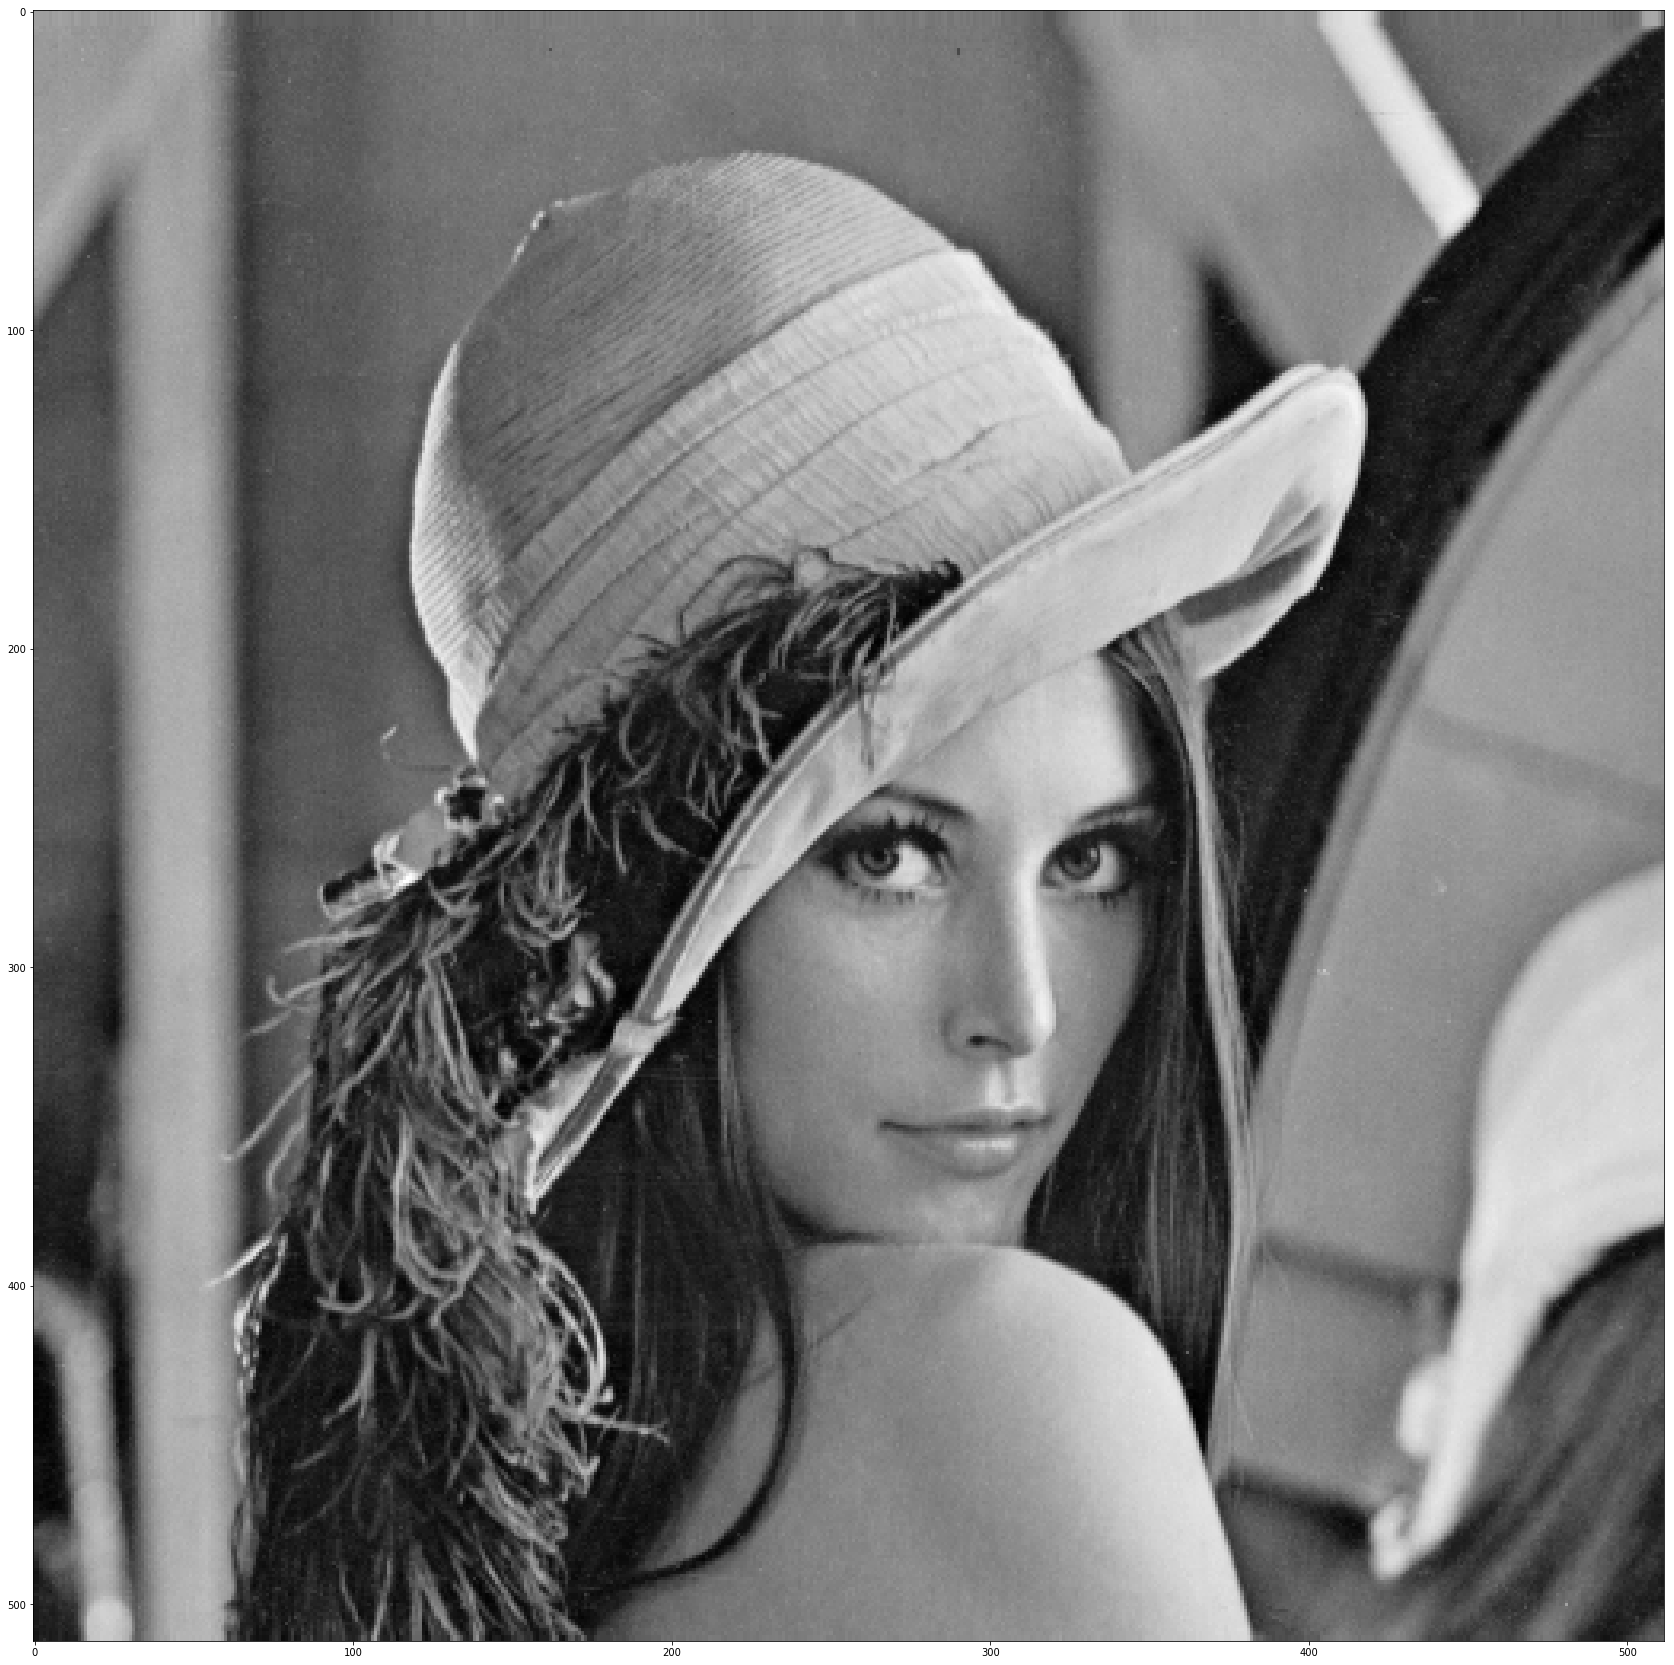

In [8]:
import urllib.request
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as st

#HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/circle_128.png')
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)
Y = cv2.cvtColor(BGR, cv2.COLOR_BGR2YCrCb)[:,:,0]
plt.figure(figsize = (30,30))
plt.imshow(Y, cmap="gray")

In [3]:
L, H = pywt.dwt2(Y, wavelet, mode='per')

In [4]:
zero = np.zeros(L.shape, np.float64)

In [5]:
L0 = np.full(Y.shape, np.nan)

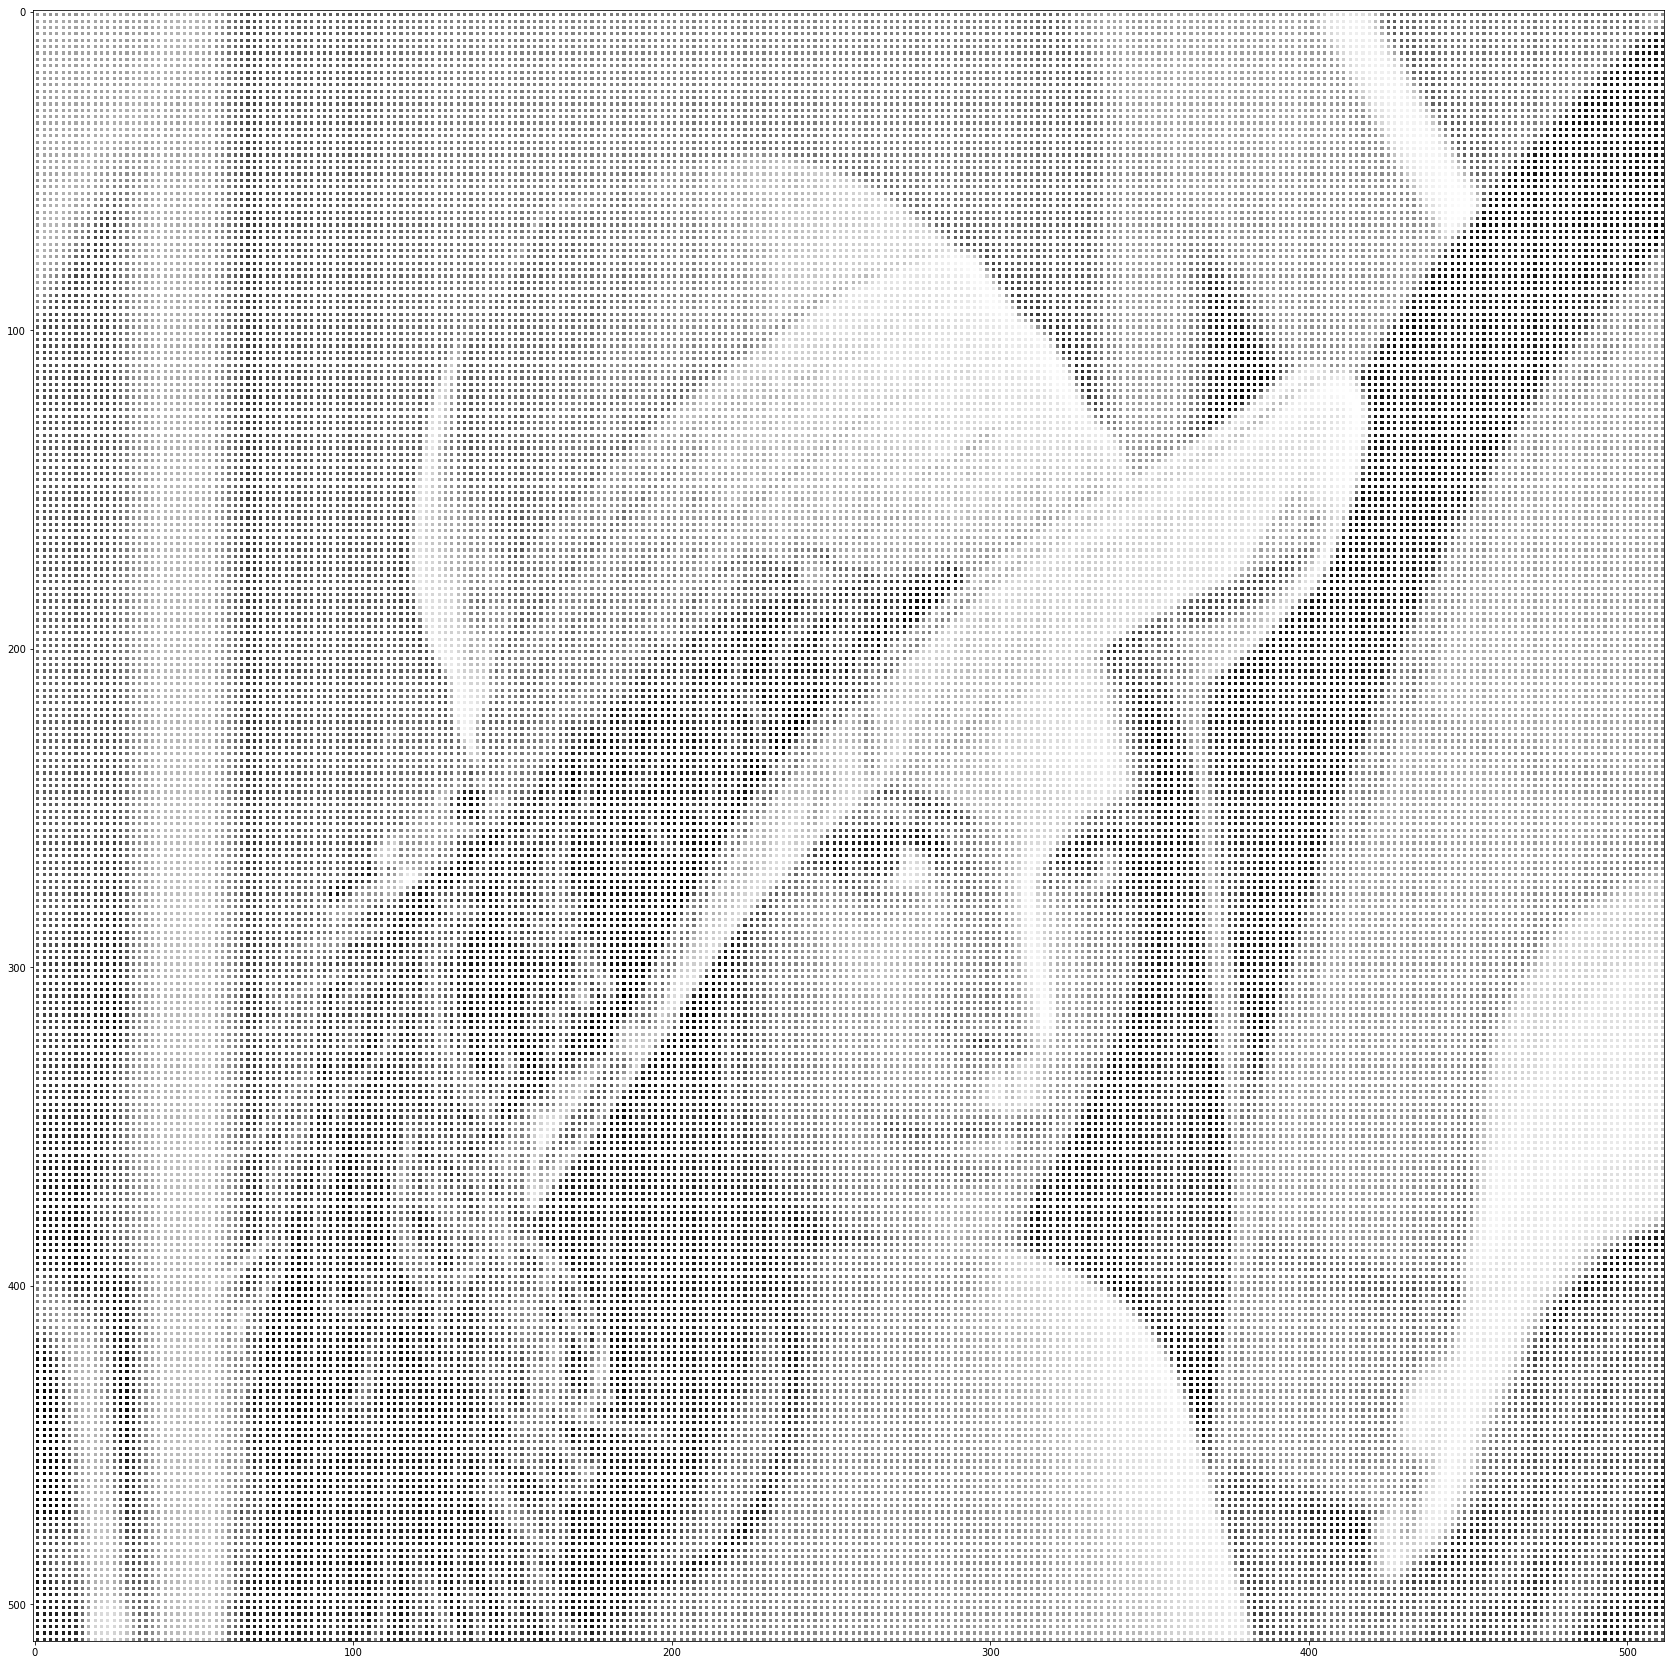

In [7]:
L0[1::2,1::2]=L
plt.figure(figsize = (30,30))
plt.imshow(L0, cmap="gray", interpolation='nearest')

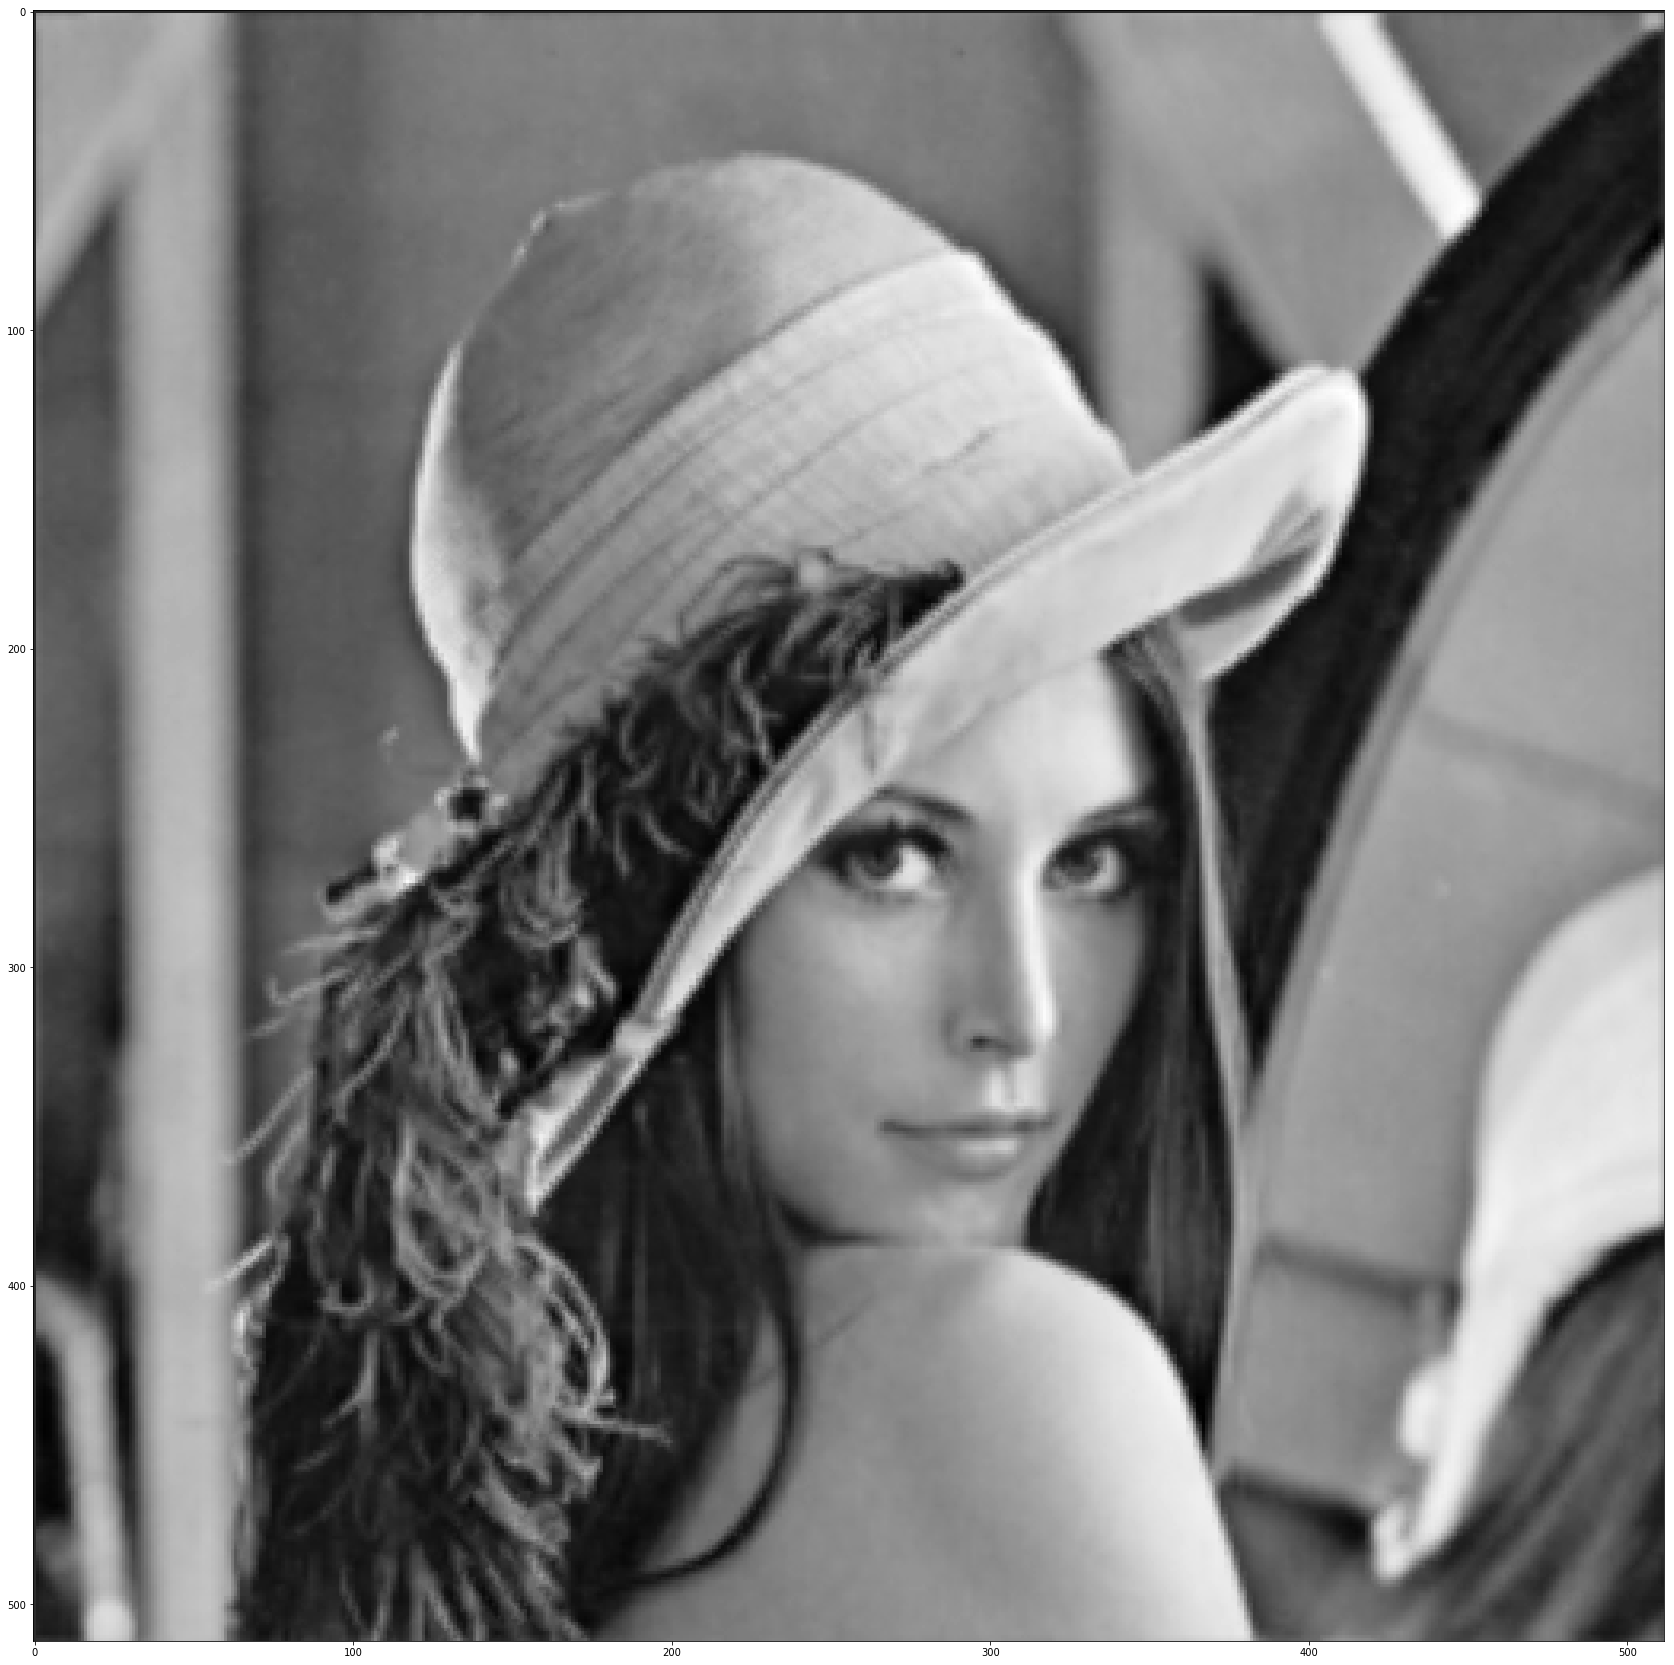

In [12]:
from scipy import interpolate

valid_mask = ~np.isnan(L0)
coords = np.array(np.nonzero(valid_mask)).T
values = L0[valid_mask]
it = interpolate.LinearNDInterpolator(coords, values, fill_value=128)
Lm1 = it(list(np.ndindex(L0.shape))).reshape(L0.shape)
plt.figure(figsize = (30,30))
plt.imshow(Lm1, cmap="gray", interpolation='nearest')

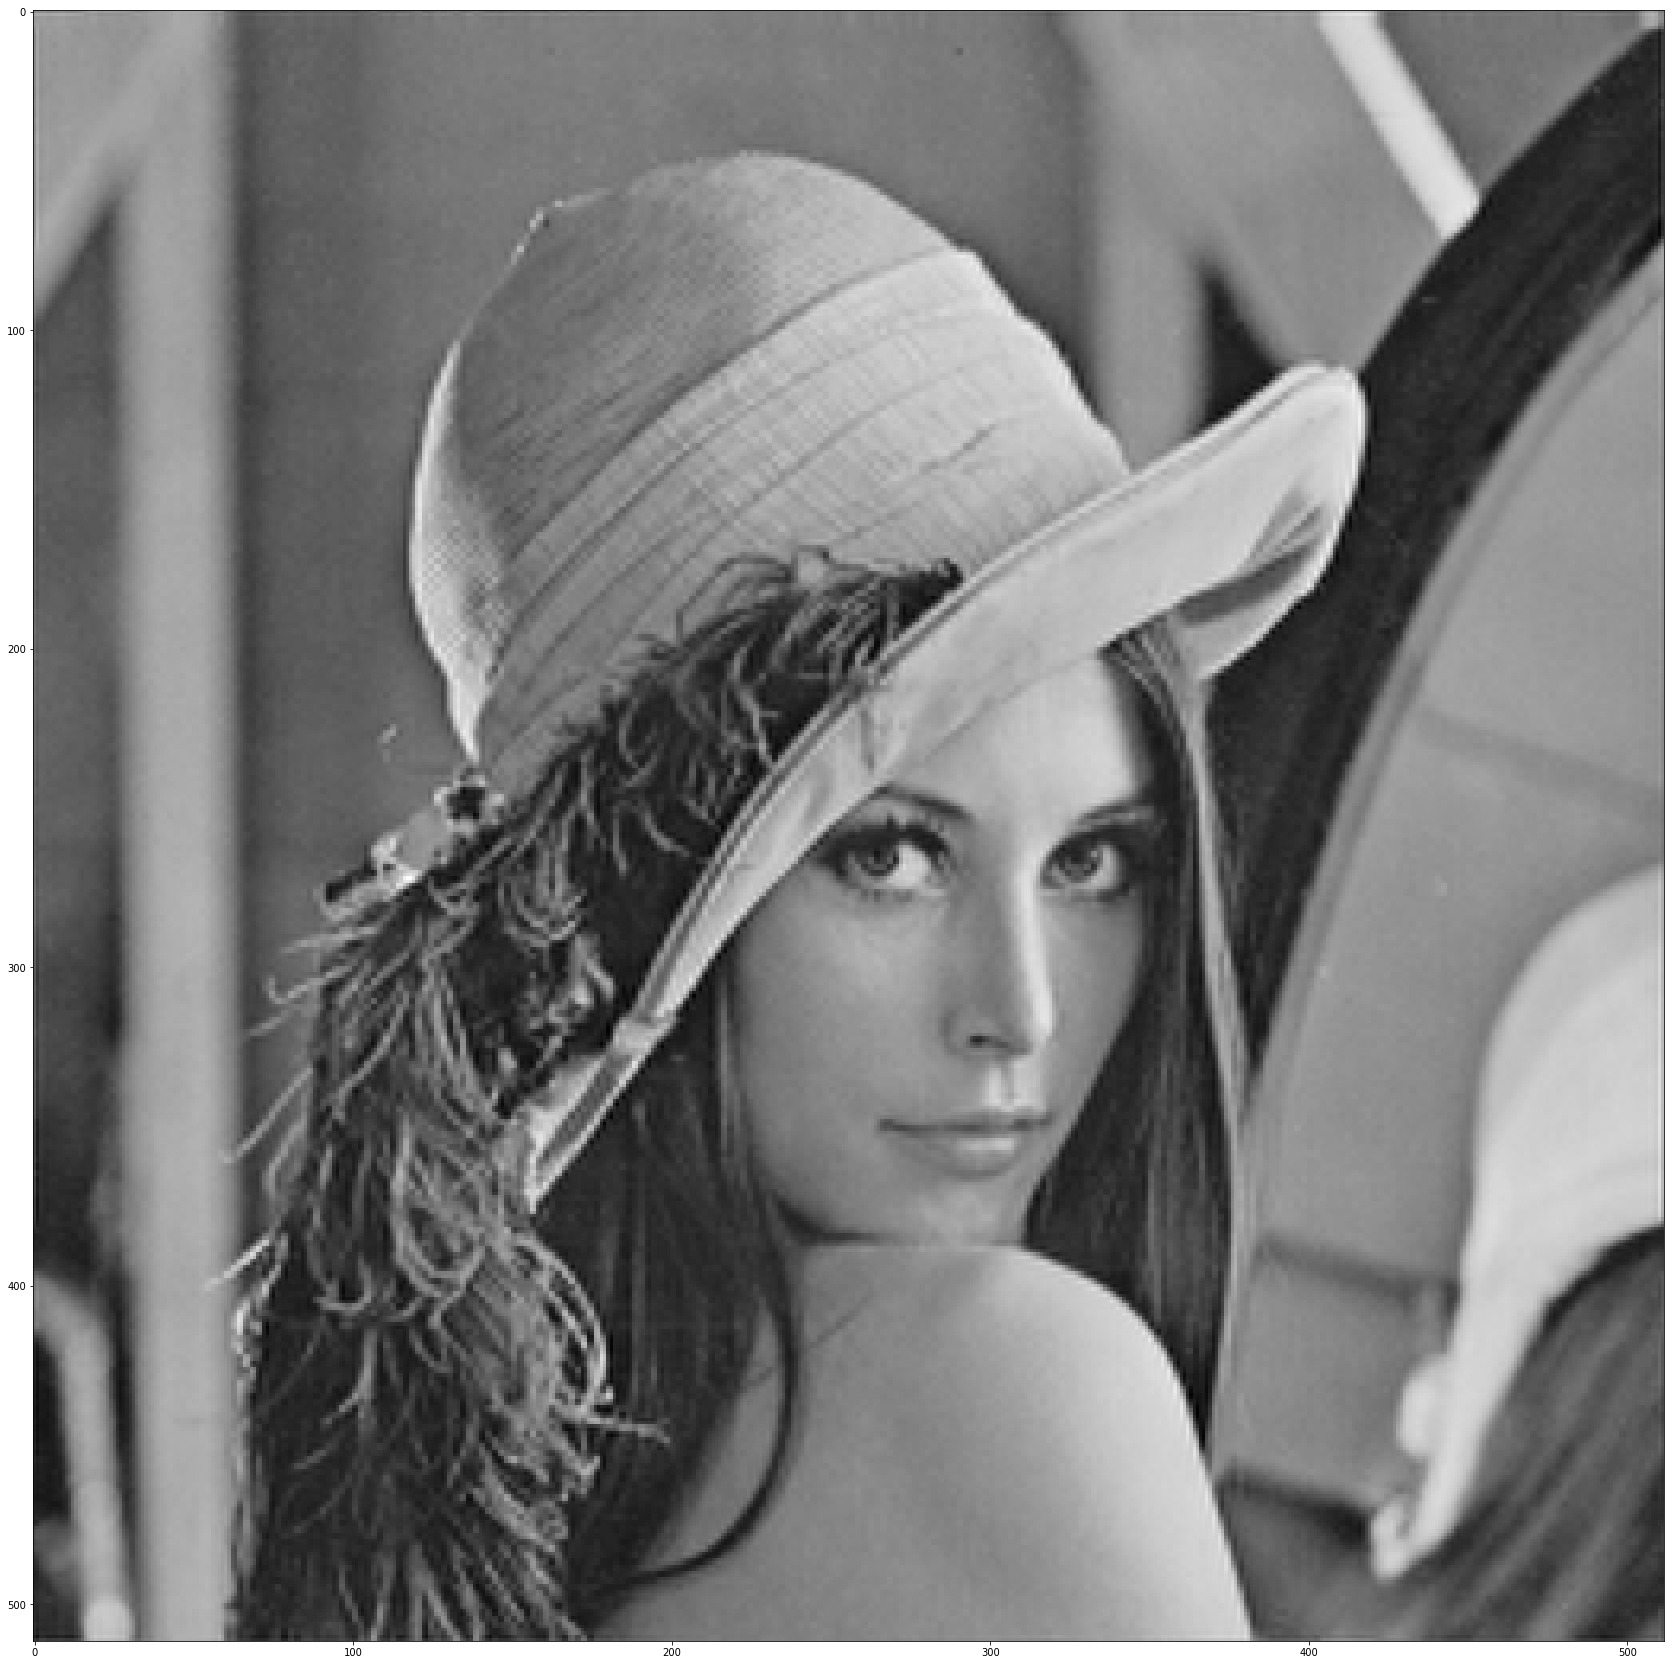

In [16]:
Y_ = pywt.idwt2((L, (zero, zero, zero)), wavelet=wavelet, mode='per')
plt.figure(figsize = (30,30))
plt.imshow(Y_, cmap="gray", interpolation='nearest')